In [1]:
import numpy as np
import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt
import pandas_datareader as web
from sklearn.model_selection import train_test_split
import matplotlib.dates as mdates
from statsmodels.tsa.arima.model import ARIMA
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn import metrics


C:\Users\Jimmy\anaconda3\envs\mine272\lib\site-packages\statsmodels\compat\pandas.py:61: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


            Price (CAD)
Date                   
2004-11-19        534.4
2004-11-26        531.8
2004-12-03        537.8
2004-12-10        532.6
2004-12-17        540.8
...                 ...
2020-02-28       2161.0
2020-03-06       2260.8
2020-03-13       2186.0
2020-03-20       2145.1
2020-03-27       2276.6

[777 rows x 1 columns]
            Price (CAD)
Date                   
2017-03-24       1668.3
2017-03-31       1660.2
2017-04-07       1695.9
2017-04-21       1732.5
2017-04-28       1731.6
...                 ...
2020-02-28       2161.0
2020-03-06       2260.8
2020-03-13       2186.0
2020-03-20       2145.1
2020-03-27       2276.6

[155 rows x 1 columns]


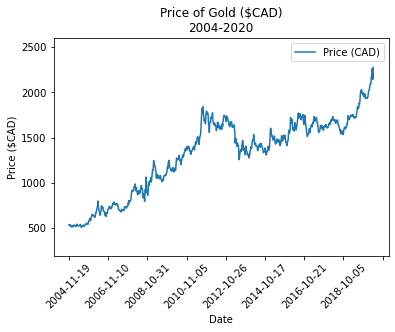

In [2]:
goldPrice = pd.read_csv("Gold_Data.csv", infer_datetime_format = True,
                 usecols = [0,1], 
                 index_col = ['Date'])

goldPrice = goldPrice.replace(',','',regex=True)
# print(goldPrice[740:-1])
goldPrice['Price (CAD)'] = goldPrice['Price (CAD)'].astype(float)
#goldPrice.drop(goldPrice.tail(37).index,inplace=True)
print(goldPrice)
print(goldPrice[(777-155):777])
goldPrice.plot()
plt.title('Price of Gold ($CAD)\n2004-2020')
plt.ylim(ymin=200,ymax=2600)
plt.ylabel('Price ($CAD)')
plt.xticks(rotation=45)
plt.show()


In [3]:
#ARIMA Setup


C:\Users\Jimmy\anaconda3\envs\mine272\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


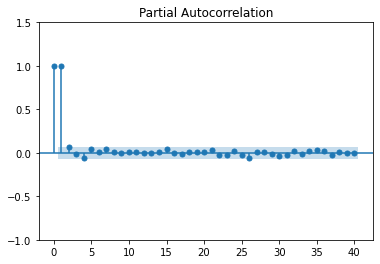

In [4]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
#PACF, determines AR, or P
plot_pacf(goldPrice, lags = 40)
plt.ylim(ymin=-1,ymax=1.5)
plt.show()

#get that AR = 2

Text(0.5, 1.0, 'Differencing Plot')

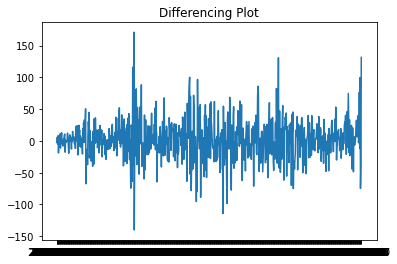

In [5]:
#stationary, determines I, or D
plt.plot(goldPrice.diff())
plt.title('Differencing Plot')
#get that I = 2

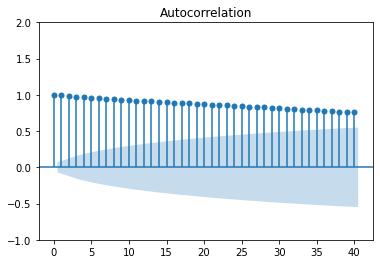

In [6]:
#ACF, determines MA, or Q
plot_acf(goldPrice, lags = 40)
plt.ylim(ymin=-1,ymax=2)
plt.show()

#get that MA = 0

In [7]:
# goldModel = ARIMA(goldPrice, order=(1,1,1)
# model_fit = goldModel.fit()
# print(model_fit.summary())

forecasted=1643.905703, actual=1668.300000
forecasted=1667.337130, actual=1660.200000
forecasted=1660.338177, actual=1695.900000
forecasted=1695.884820, actual=1732.500000
forecasted=1731.531299, actual=1731.600000
forecasted=1731.785203, actual=1681.500000
forecasted=1682.595308, actual=1689.500000
forecasted=1690.120356, actual=1695.800000
forecasted=1694.887142, actual=1701.900000
forecasted=1701.844314, actual=1723.100000
forecasted=1722.852938, actual=1701.000000
forecasted=1701.040782, actual=1662.300000
forecasted=1663.369530, actual=1664.800000
forecasted=1665.101863, actual=1613.300000
forecasted=1613.252999, actual=1567.000000
forecasted=1568.073301, actual=1558.800000
forecasted=1558.498473, actual=1563.900000
forecasted=1563.150165, actual=1571.500000
forecasted=1571.241494, actual=1591.200000
forecasted=1591.058148, actual=1631.400000
forecasted=1631.071414, actual=1632.700000
forecasted=1632.539250, actual=1606.100000
forecasted=1606.883837, actual=1634.700000
forecasted=

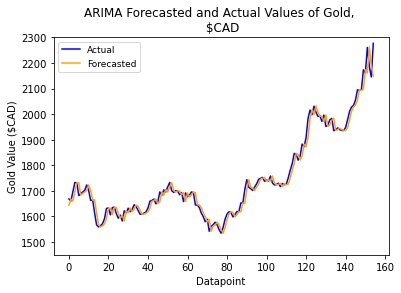

In [8]:
gold_prices =  goldPrice.values
size = int(len(gold_prices) - 155) #train test split setup
train, test = gold_prices[0:size], gold_prices[size:len(gold_prices)]
history_Gold = [x for x in train] #creates an empty array for comparison
predictions = list() #list for forecasted values



for t in range(len(test)): #for loop to iterate through the length of the test set
    model = ARIMA(history_Gold, order=(3,1,0)) #arima model
    model_fit = model.fit() #fits model
    
    output = model_fit.forecast() #forecasts the price values
    forecast_value = output[0] #array of forecasted values
    
    predictions.append(forecast_value) #append the forecasted value
    actual = test[t] #locates the value of the test data
    history_Gold.append(actual) #append test values
    print('forecasted=%f, actual=%f' % (forecast_value, actual))

   
#(2,2,0) -> 27.474    
#(2,1,0) -> 23.819
#(1,1,0) -> 23.797
#(1,0,0) -> 23.758
#(2,0,0) -> 23.806
#(1,2,0) -> 28.383
#(3,2,0) -> 26.938
#(3,1,0) -> 23.854
#(3,0,0) -> 23.827
mae = metrics.mean_absolute_error(test,predictions)
mse = metrics.mean_squared_error(test,predictions)
rmse = np.sqrt(mean_squared_error(test, predictions))




#R2 = np.sqrt(metrics.mean_squared_error(test,predictions))
print('Test MAE: %.3f' % mae)
print('Test MSE: %.3f' % mse)
print('Test RMSE: %.3f' % rmse)



plt.plot(test, label='Actual', color='blue')
plt.plot(predictions, label = 'Forecasted', color='orange')
plt.ylim(ymin=1450,ymax=2300)

plt.xlabel('Datapoint')
plt.ylabel('Gold Value ($CAD)')
plt.title('ARIMA Forecasted and Actual Values of Gold, \n $CAD')

plt.legend(loc='upper left', fontsize=9)
plt.show()


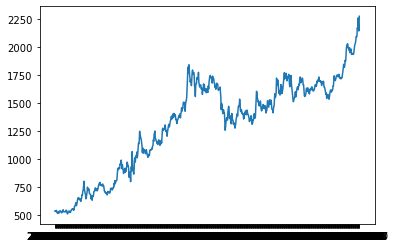

In [9]:
plt.plot(goldPrice)
plt.plot()
plt.show()

In [10]:
# plot forecasts against actual outcomes

# plt.plot((, train, color = 'blue')
# plt.plot((622,777,154), train, color = 'blue')
# plot.plot((622,777,154), predictions, color='red')

plt.plot(np.linspace(1, 622, 622), train[len(X)-155:len(X)], color = 'green')

plt.plot(np.linspace(622, 777, 154), test, color = 'green')
plt.plot(np.linspace(622, 777, 154), predictions, color='red')
plt.show()

NameError: name 'X' is not defined